In [1]:
#importation et configuration des packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("crest", as_cmap=True)
from sklearn.metrics import r2_score, mean_squared_error




In [2]:
data = pd.read_csv(r"C:\Users\sesa638933\Desktop\OC\P3\Pélec_zeff_jonas\building-energy-cleaned.csv")
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,LargestPropertyUseType,SecondLargestPropertyUseType,YearsENERGYSTARCertified,Address,State,...,TotalGHGEmissions,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance,IsHospital,txIsHospital
0,400,2015,NonResidential,Small- and Mid-Sized Office,GALLAND & SENECA BUILDINGS,Office,NaN,NaN,1201 2ND AVE,WA,...,47.24,109,1,0.73651,0.26349,98370.0,16395.000,0.236408,0,0.0
1,442,2015,NonResidential,Large Office,KING BROADCASTING,Office,Parking,NaN,333 DEXTER AVE N,WA,...,116.84,68,5,0.80466,0.19534,193788.0,48447.000,1.171413,0,0.0
2,499,2015,NonResidential,Small- and Mid-Sized Office,ASIAN COUNSELING and REFERRAL SERVICE BUILDING,Office,Parking,NaN,3639 MARTIN LUTHER KING JR WAY S,WA,...,134.69,7,2,0.72049,0.27951,76598.0,25532.667,2.924194,0,0.0
3,559,2015,NonResidential,Large Office,YALE & THOMAS,Office,Parking,NaN,325 EASTLAKE AVE E,WA,...,226.92,34,2,1.00000,0.00000,186971.0,46742.750,1.044201,0,0.0
4,675,2015,NonResidential,Medical Office,NINTH & JEFFERSON BLDG - HARBORVIEW,Medical Office,Parking,2011,908 JEFFERSON ST,WA,...,1891.47,7,2,0.42459,0.57541,434475.0,28965.000,0.405103,0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   OSEBuildingID                 1033 non-null   int64  
 1   DataYear                      1033 non-null   int64  
 2   BuildingType                  1033 non-null   object 
 3   PrimaryPropertyType           1033 non-null   object 
 4   PropertyName                  1033 non-null   object 
 5   LargestPropertyUseType        1033 non-null   object 
 6   SecondLargestPropertyUseType  516 non-null    object 
 7   YearsENERGYSTARCertified      97 non-null     object 
 8   Address                       1033 non-null   object 
 9   State                         1033 non-null   object 
 10  ZipCode                       1033 non-null   float64
 11  NumberofBuildings             1033 non-null   float64
 12  NumberofFloors                1033 non-null   float64
 13  Pro

In [4]:
data = data.rename(columns={'SiteEnergyUse(kBtu)': 'SiteEnergyUse'})

In [5]:
#Analyse univariée pour chaque variable
data.describe()


,OSEBuildingID,DataYear,ZipCode,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse,SteamUse(kBtu),...,TotalGHGEmissions,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance,IsHospital,txIsHospital
count,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1.033000e+03,1.033000e+03,1033.000000,1.033000e+03,1.033000e+03,...,1033.000000,1033.000000,1033.00000,1033.000000,1033.000000,1.033000e+03,1033.000,1033.000000,1033.000000,1033.000000
mean,14755.292352,2015.986447,98116.747338,1.015973,5.039690,1.287111e+05,1.062452e+05,62.940949,8.772578e+06,5.941602e+05,...,192.150242,53.055179,1.74153,0.925410,0.074590,1.283675e+05,inf,2.717372,0.009681,0.012010
std,13472.203555,0.115681,19.001098,0.283572,7.976429,2.087185e+05,1.715886e+05,28.393550,2.523819e+07,6.158974e+06,...,837.819613,32.082136,1.00193,0.142489,0.142489,2.130434e+05,NaN,2.201245,0.097960,0.134973
min,1.000000,2015.000000,98006.000000,0.500000,0.000000,2.000000e+04,8.061000e+03,1.000000,8.126790e+04,0.000000e+00,...,0.705000,1.000000,1.00000,0.099090,-0.000010,7.166667e+03,221.697,0.021130,0.000000,0.000000
25%,557.000000,2016.000000,98104.000000,1.000000,1.000000,3.156900e+04,2.760000e+04,43.500000,1.299184e+06,0.000000e+00,...,20.470000,28.000000,1.00000,0.906880,0.000000,3.152100e+04,12960.000,0.791098,0.000000,0.000000
50%,20440.000000,2016.000000,98109.000000,1.000000,3.000000,5.373000e+04,4.811200e+04,69.500000,2.811901e+06,0.000000e+00,...,51.135000,49.000000,1.00000,1.000000,0.000000,5.496900e+04,22460.000,2.101375,0.000000,0.000000
75%,24209.000000,2016.000000,98122.000000,1.000000,5.000000,1.244720e+05,1.041195e+05,87.000000,7.854203e+06,0.000000e+00,...,142.910000,79.000000,2.00000,1.000000,0.093120,1.290000e+05,38000.000,4.119682,0.000000,0.000000
max,50081.000000,2016.000000,98199.000000,5.000000,99.000000,1.952220e+06,1.680937e+06,100.000000,4.483853e+08,1.314066e+08,...,16870.980000,116.000000,11.00000,1.000010,0.900910,2.761918e+06,inf,8.842992,1.000000,2.697535


In [6]:
for label in ['TotalGHGEmissions', 'SiteEnergyUse'] :
    print("Le nombre de bâtiments dont {} est manquant est de : {}".format(label, data[label].isna().sum()))
    print("Le nombre de bâtiments dont {} est <=0 est de : {}".format(label, sum(data[label]<0.0)))
    data = data[data[label]>=0.0] # Suppresion des bâtiments dont la valeur est négative ou nulle

Le nombre de bâtiments dont TotalGHGEmissions est manquant est de : 0
Le nombre de bâtiments dont TotalGHGEmissions est <=0 est de : 0
Le nombre de bâtiments dont SiteEnergyUse est manquant est de : 0
Le nombre de bâtiments dont SiteEnergyUse est <=0 est de : 0


In [7]:
# Nombre d'occurences par 'PrimaryPropertyType'
data["PrimaryPropertyType"].value_counts()

Small- and Mid-Sized Office    246
Large Office                   165
Warehouse                      143
Retail Store                    77
Hotel                           71
Worship Facility                63
K-12 School                     50
Distribution Center             41
Medical Office                  40
Supermarket / Grocery Store     39
Mixed Use Property              27
Residence Hall                  19
Senior Care Community           18
Other                           14
Hospital                        10
Refrigerated Warehouse           5
Laboratory                       2
Self-Storage Facility            1
Non-Refrigerated Warehouse       1
Restaurant                       1
Name: PrimaryPropertyType, dtype: int64

In [8]:
#Observons les variables avec des valeurs infinies
data[(data.GFAPerBuilding == np.inf) | (data.GFAPerFloor == np.inf)].head()


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,LargestPropertyUseType,SecondLargestPropertyUseType,YearsENERGYSTARCertified,Address,State,...,TotalGHGEmissions,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance,IsHospital,txIsHospital
332,656,2016,NonResidential,Medical Office,Arnold Pavilion,Medical Office,NaN,NaN,1221 Madison Street,WA,...,648.285,12,1,1.0,0.0,225982.0,inf,0.491603,0,0.0
333,657,2016,NonResidential,Mixed Use Property,2200 Westlake - SEDO,Parking,Multifamily Housing,NaN,2200 Westlake Ave.,WA,...,978.705,10,7,1.0,0.0,1032814.0,inf,0.838548,0,0.0
714,23311,2016,NonResidential,Medical Office,HART First Hill LLC,Medical Office,Parking,NaN,1124 Columbia Street,WA,...,1112.250,71,2,1.0,0.0,274568.0,inf,0.424374,0,0.0
989,40028,2016,NonResidential,Warehouse,Sandpoint #5,Non-Refrigerated Warehouse,Office,NaN,7561 63rd Ave NE,WA,...,399.220,76,2,1.0,0.0,384772.0,inf,6.307493,0,0.0
990,40031,2016,NonResidential,Medical Office,Sandpoint #25,Medical Office,NaN,NaN,6222 NE 74th St,WA,...,30.300,56,1,1.0,0.0,30287.0,inf,6.184218,0,0.0


In [9]:
data['GFAPerBuilding'] = np.where(((data.GFAPerBuilding == np.inf) & (data.NumberofBuildings == 0)),0, data.GFAPerBuilding)
data['GFAPerFloor'] = np.where(((data.GFAPerFloor == np.inf) & (data.NumberofFloors == 0)),0, data.GFAPerFloor)


In [10]:
data[data['ENERGYSTARScore'].isnull()==False]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,LargestPropertyUseType,SecondLargestPropertyUseType,YearsENERGYSTARCertified,Address,State,...,TotalGHGEmissions,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance,IsHospital,txIsHospital
0,400,2015,NonResidential,Small- and Mid-Sized Office,GALLAND & SENECA BUILDINGS,Office,NaN,NaN,1201 2ND AVE,WA,...,47.24,109,1,0.73651,0.26349,98370.0,16395.000,0.236408,0,0.0
1,442,2015,NonResidential,Large Office,KING BROADCASTING,Office,Parking,NaN,333 DEXTER AVE N,WA,...,116.84,68,5,0.80466,0.19534,193788.0,48447.000,1.171413,0,0.0
2,499,2015,NonResidential,Small- and Mid-Sized Office,ASIAN COUNSELING and REFERRAL SERVICE BUILDING,Office,Parking,NaN,3639 MARTIN LUTHER KING JR WAY S,WA,...,134.69,7,2,0.72049,0.27951,76598.0,25532.667,2.924194,0,0.0
3,559,2015,NonResidential,Large Office,YALE & THOMAS,Office,Parking,NaN,325 EASTLAKE AVE E,WA,...,226.92,34,2,1.00000,0.00000,186971.0,46742.750,1.044201,0,0.0
4,675,2015,NonResidential,Medical Office,NINTH & JEFFERSON BLDG - HARBORVIEW,Medical Office,Parking,2011,908 JEFFERSON ST,WA,...,1891.47,7,2,0.42459,0.57541,434475.0,28965.000,0.405103,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,50054,2016,Nonresidential COS,Large Office,400 FAIRVIEW OFFICE BLDG,Office,Parking,NaN,400 FAIRVIEW AVE N,WA,...,245.16,2,3,0.63171,0.36829,536697.0,41284.385,1.129240,0,0.0
1029,50062,2016,NonResidential,Hotel,Olympic Hospitality,Hotel,Parking,NaN,3926 Aurora Ave N,WA,...,131.02,2,3,0.67246,0.32754,126823.0,31705.750,3.426812,0,0.0
1030,50068,2016,NonResidential,Warehouse,Airport - Maintenance Shop - DOT: KCIA,Non-Refrigerated Warehouse,NaN,NaN,6518 Ellis,WA,...,157.70,61,1,0.91894,0.08106,52085.0,52085.000,4.329191,0,0.0
1031,50069,2016,NonResidential,Small- and Mid-Sized Office,Airport - Main Terminal,Office,NaN,NaN,7277 Perimeter Rd.,WA,...,134.80,87,1,1.00000,0.00000,24990.0,12495.000,5.370123,0,0.0


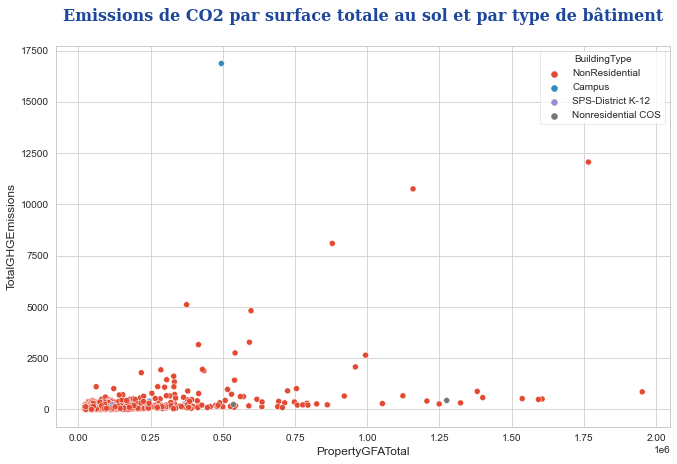

In [11]:
#Scatterplot de la distribution des emissions de CO2 par surface totale au sol et par type de bâtiment
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig = plt.figure(figsize=(11,7))
sns.scatterplot(data = data, x='PropertyGFATotal', y='TotalGHGEmissions', hue='BuildingType')
plt.title(f"Emissions de CO2 par surface totale au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)
plt.show()

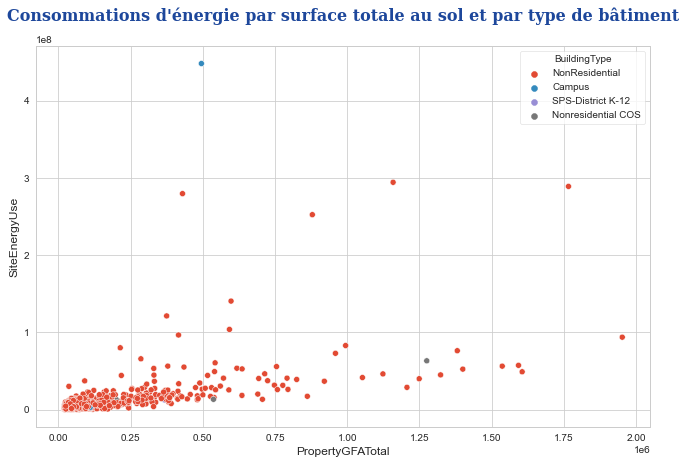

In [12]:
#Scatterplot de la distribution des consommations d'énergie par surface totale au sol et par type de bâtiment
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig = plt.figure(figsize=(11,7))
sns.scatterplot(data = data, x='PropertyGFATotal', y='SiteEnergyUse', hue='BuildingType')
plt.title(f"Consommations d'énergie par surface totale au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)
plt.show()

In [13]:
#visualisation de la valeur atypique
data[data['SiteEnergyUse']>4*10**8]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,LargestPropertyUseType,SecondLargestPropertyUseType,YearsENERGYSTARCertified,Address,State,...,TotalGHGEmissions,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance,IsHospital,txIsHospital
34,43,2016,Campus,Mixed Use Property,Plant 2 Site,Office,Laboratory,NaN,7755 E MARGINAL WAY S,WA,...,16870.98,24,5,1.0,0.0,494835.0,164945.0,4.965239,0,0.0


In [14]:
#Isolons les valeurs non atypiques
data = data[data['SiteEnergyUse']<4*10**8]


In [15]:
#Regroupons les données d'identification des bâtiments pour faciliter leur modélisation
identification_features = ['OSEBuildingID', 'PropertyName', 'Address', 'ZipCode']
data_identification = data[identification_features]
data.drop(identification_features, axis=1, inplace = True)

In [16]:
#On exclu toutes les variables de relève qui ne seront pas prises en compte dans notre programme
data_filter = data.drop(['SteamUse(kBtu)','Electricity(kBtu)',
                         'NaturalGas(kBtu)'], axis=1)

In [17]:
data_filter['IsHospital'] = np.where(data_filter['PrimaryPropertyType']=='Hospital', 1, 0)

In [18]:
data_filter['IsCampus'] = np.where(data_filter['BuildingType']=='Campus', 1, 0)

In [19]:
data_filter['IsHospitalGeneral'] = np.where(data_filter['LargestPropertyUseType']=='Hospital (General Medical & Surgical)', 1, 0)

In [20]:
#On sépare les données numériques et les données catégorielles
numerical_features = data_filter.select_dtypes(include=['int64','float64'])
categorical_features = data_filter.select_dtypes(exclude=['int64','float64']) 

In [21]:
#Observons les variables catégorielles
categorical_features.nunique()

BuildingType                     4
PrimaryPropertyType             20
LargestPropertyUseType          25
SecondLargestPropertyUseType    34
YearsENERGYSTARCertified        64
State                            1
IsHospital                       2
IsCampus                         2
IsHospitalGeneral                2
dtype: int64

In [22]:
#Observons les variables numériques
numerical_features.nunique()

DataYear                        2
NumberofBuildings              10
NumberofFloors                 44
PropertyGFATotal             1003
LargestPropertyUseTypeGFA     998
ENERGYSTARScore               193
SiteEnergyUse                1032
TotalGHGEmissions            1022
BuildingAge                   110
TotalUseTypeNumber              8
GFABuildingRate               272
GFAParkingRate                272
GFAPerBuilding               1004
GFAPerFloor                  1010
harvesine_distance            992
txIsHospital                   11
dtype: int64

In [23]:
#ENERGYSTARScore est insuffisement complété mais nous la gardons de côté pour voir son possible impact sur la qualité de prédiction
energystar_score = numerical_features['ENERGYSTARScore']
#On supprime ENERGYSTARScore et DataYear(varable inutile pour notre modèle) de notre dataset
numerical_features = numerical_features.drop(['ENERGYSTARScore','DataYear'], axis=1)

In [24]:
data_filter.columns

Index(['DataYear', 'BuildingType', 'PrimaryPropertyType',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'YearsENERGYSTARCertified', 'State', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse', 'TotalGHGEmissions', 'BuildingAge',
       'TotalUseTypeNumber', 'GFABuildingRate', 'GFAParkingRate',
       'GFAPerBuilding', 'GFAPerFloor', 'harvesine_distance', 'IsHospital',
       'txIsHospital', 'IsCampus', 'IsHospitalGeneral'],
      dtype='object')

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
#'TotalGHGEmissions~DataYear+BuildingType+PrimaryPropertyType+LargestPropertyUseType+YearsENERGYSTARCertified+State+NumberofBuildings+NumberofFloors+PropertyGFATotal+LargestPropertyUseTypeGFA+ENERGYSTARScore+BuildingAge+TotalUseTypeNumber+GFABuildingRate+GFAParkingRate+GFAPerBuilding+GFAPerFloor+harvesine_distance+IsHospital+txIsHospital+IsCampus+IsHospitalGeneral', data=data_filter).fit()


In [26]:
#On standardise nos valeurs numériques pour les entrer dans notre modèle de prédiction via un centrage-réduction
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, RobustScaler
from category_encoders.target_encoder import TargetEncoder
from sklearn.compose import ColumnTransformer

#On regroupe les données par chaque catégorie et compte de nombre d'occurrences de chaque cible puis on
#calcul la probabilité que chaque cible se produise pour chaque groupe spécifique.
target_features = ['BuildingType','PrimaryPropertyType','LargestPropertyUseType',
                   'SecondLargestPropertyUseType','IsHospital','IsHospitalGeneral','State','YearsENERGYSTARCertified']


numeric_features = ['TotalGHGEmissions','SiteEnergyUse','NumberofBuildings','NumberofFloors','ENERGYSTARScore',
                    'LargestPropertyUseTypeGFA','TotalUseTypeNumber','GFAPerBuilding','txIsHospital']
target_transformer = TargetEncoder()
numeric_transformer = RobustScaler(unit_variance=True)

preprocessor = ColumnTransformer(transformers=[
    ('target', target_transformer, target_features),
    ('numeric', numeric_transformer, numeric_features)
])

In [27]:
#On supprime les variables qui n'apporteront rien à notre modèle comme les constantes
categorical_features = categorical_features.drop(['State','YearsENERGYSTARCertified'], axis=1)

In [28]:
reg_multi1 = smf.ols('TotalGHGEmissions~NumberofBuildings+NumberofFloors+LargestPropertyUseTypeGFA+TotalUseTypeNumber+GFAPerBuilding+IsHospital+txIsHospital+IsHospitalGeneral', data=data_filter).fit()
print(reg_multi1.summary())

                            OLS Regression Results                            
Dep. Variable:      TotalGHGEmissions   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     422.0
Date:                Fri, 28 Jan 2022   Prob (F-statistic):          1.45e-296
Time:                        10:42:40   Log-Likelihood:                -7459.9
No. Observations:                1032   AIC:                         1.494e+04
Df Residuals:                    1024   BIC:                         1.498e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [29]:
data_filter_E = data_filter.filter(items=['TotalGHGEmissions','NumberofBuildings','NumberofFloors',
                    'LargestPropertyUseTypeGFA','TotalUseTypeNumber','GFAPerBuilding','txIsHospital',
                    'IsHospital','IsHospitalGeneral'])

In [30]:
reg_multi2 = smf.ols('SiteEnergyUse~LargestPropertyUseTypeGFA+TotalUseTypeNumber+GFAPerBuilding+IsHospital+txIsHospital+IsHospitalGeneral', data=data_filter).fit()
print(reg_multi2.summary())

                            OLS Regression Results                            
Dep. Variable:          SiteEnergyUse   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     444.2
Date:                Fri, 28 Jan 2022   Prob (F-statistic):          1.08e-253
Time:                        10:42:40   Log-Likelihood:                -18279.
No. Observations:                1032   AIC:                         3.657e+04
Df Residuals:                    1026   BIC:                         3.660e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [31]:
data_filter_C = data_filter.filter(items=['SiteEnergyUse','LargestPropertyUseTypeGFA','TotalUseTypeNumber','GFAPerBuilding','txIsHospital',
                    'IsHospital','IsHospitalGeneral'])

In [32]:
data_filter.shape


(1032, 25)

In [33]:
from sklearn.model_selection import train_test_split

X = data_filter_E.drop(['TotalGHGEmissions'], axis=1)
Y = data_filter_E['TotalGHGEmissions']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))

Entrainement: 825 lignes,
Test: 207 lignes.



In [34]:
#Histogramme de la distribution des emissions de CO2 avec changement d'échelle logarithmique
from sklearn.preprocessing import FunctionTransformer

logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
Y_log = logtransformer.transform(Y)


In [35]:
results = pd.DataFrame(columns = ['r2','time'])

In [36]:
results_S = pd.DataFrame(columns = ['r2','time'])

In [37]:
from sklearn import neighbors, metrics, model_selection
# Fixer les valeurs des hyperparamètres à tester
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

#paramétrage du modèle
param_mlr_E = {'n_jobs': np.arange(0,1,0.1)}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'r2'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf_mlr_E = model_selection.GridSearchCV(
    LinearRegression(), # un classifieur kNN
    param_mlr_E,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score)   # score à optimiser


# Optimiser ce classifieur sur le jeu d'entraînement
clf_mlr_E = clf_mlr_E.fit(X_train, Y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf_mlr_E.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf_mlr_E.cv_results_['mean_test_score'], # score moyen
        clf_mlr_E.cv_results_['std_test_score'],  # écart-type du score
        clf_mlr_E.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        param_mlr_E
    ) )

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_jobs': 0.0}
Résultats de la validation croisée :
r2 = 0.124 (+/-1.036) for {'n_jobs': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}
r2 = 0.124 (+/-1.036) for {'n_jobs': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}
r2 = 0.124 (+/-1.036) for {'n_jobs': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}
r2 = 0.124 (+/-1.036) for {'n_jobs': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}
r2 = 0.124 (+/-1.036) for {'n_jobs': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}
r2 = 0.124 (+/-1.036) for {'n_jobs': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}
r2 = 0.124 (+/-1.036) for {'n_jobs': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}
r2 = 0.124 (+/-1.036) for {'n_jobs': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}
r2 = 0.124 (+/-1.036) for {'n_jobs': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}
r2 = 0.124 (+/-1.036) for 

In [38]:
print(clf_mlr_E.score(X_train, Y_train))
print(clf_mlr_E.score(X_test,Y_test))


0.5995792449092049
0.7350011260232399


In [39]:
model_mlr_E= clf_mlr_E.best_estimator_

In [40]:
model_mlr_E.score(X_test, Y_test)

0.7350011260232399

In [41]:
import timeit

start_time = timeit.default_timer()

Y_pred = model_mlr_E.predict(X_test)

time_mlr_E = timeit.default_timer() - start_time
r2_mlr_E = r2_score(Y_test, Y_pred)

print("r2_mlr_E {:.2f} time {:.2f}s".format(r2_mlr_E, time_mlr_E))


r2_mlr_E 0.74 time 0.00s


In [42]:
results_S.loc['LinearRegression for TotalGHGEmissions without EnergyStarScore', 'r2'] = r2_mlr_E
results_S.loc['LinearRegression for TotalGHGEmissions without EnergyStarScore', 'time'] = time_mlr_E

In [43]:
mean_squared_error(Y_test,Y_pred)

332002.77594384714

In [44]:
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

from sklearn import neighbors, metrics, model_selection
# Fixer les valeurs des hyperparamètres à tester
from sklearn.linear_model import ElasticNet
#paramétrage du modèle
param_eNet_E = {'tol' : [0.1,0.01,0.001],
              "alpha": [0.01, 0.1, 1],  #alpha, coef qui multiplie le terme de pénalité)
              "l1_ratio": np.arange(0.0, 1.0, 0.1)}#L1 ratio , =1 équivaut à un Lasso, 0 à un Ridge
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'r2'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf_eNet_E = model_selection.GridSearchCV(
    ElasticNet(), # un classifieur kNN
    param_eNet_E,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)
# Optimiser ce classifieur sur le jeu d'entraînement
clf_eNet_E = clf_eNet_E.fit(X_train, Y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf_eNet_E.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf_eNet_E.cv_results_['mean_test_score'], # score moyen
        clf_eNet_E.cv_results_['std_test_score'],  # écart-type du score
        clf_eNet_E.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        param_eNet_E
    ) )

    

C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33928530.00955166, tolerance: 14370581.953897262
  model = cd_fast.enet_coordinate_descent(
C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33391695.280100904, tolerance: 16649005.872844622
  model = cd_fast.enet_coordinate_descent(
C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35240997.277828485, tolerance: 14985430.902740456
  model = cd_fast.enet_coordinate_descent(
C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\linear_mo

C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43151759.2144346, tolerance: 14370581.953897262
  model = cd_fast.enet_coordinate_descent(
C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45311770.58903801, tolerance: 16649005.872844622
  model = cd_fast.enet_coordinate_descent(
C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43556719.64051058, tolerance: 14985430.902740456
  model = cd_fast.enet_coordinate_descent(
C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\linear_model

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'alpha': 0.01, 'l1_ratio': 0.0, 'tol': 0.1}
Résultats de la validation croisée :
r2 = 0.288 (+/-0.900) for {'tol': [0.1, 0.01, 0.001], 'alpha': [0.01, 0.1, 1], 'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}
r2 = 0.288 (+/-0.900) for {'tol': [0.1, 0.01, 0.001], 'alpha': [0.01, 0.1, 1], 'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}
r2 = 0.288 (+/-0.900) for {'tol': [0.1, 0.01, 0.001], 'alpha': [0.01, 0.1, 1], 'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}
r2 = 0.285 (+/-0.898) for {'tol': [0.1, 0.01, 0.001], 'alpha': [0.01, 0.1, 1], 'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}
r2 = 0.285 (+/-0.898) for {'tol': [0.1, 0.01, 0.001], 'alpha': [0.01, 0.1, 1], 'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}
r2 = 0.285 (+/-0.898) for {'tol': [0.1, 0.01, 0.001], 'alpha': [0.01, 0.1, 1], 'l1_ratio': array([0. , 0.1, 0.2

C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41487883.36838984, tolerance: 18569304.38162259
  model = cd_fast.enet_coordinate_descent(


In [45]:
print(clf_eNet_E.score(X_train, Y_train))
print(clf_eNet_E.score(X_test,Y_test))

0.5828547195866991
0.7108644267295624


In [46]:
#meilleurs estimateurs isolés
model_eNet_E= clf_eNet_E.best_estimator_

In [47]:
"""model_eNet_E.score(X_test, Y_test)"""

'model_eNet_E.score(X_test, Y_test)'

In [48]:
Y_pred = model_eNet_E.predict(X_test)

In [49]:
r2_eNet_E = r2_score(Y_test, Y_pred)
r2_eNet_E

0.7108644267295624

In [50]:
start_time = timeit.default_timer()

Y_pred = model_eNet_E.predict(X_test)

time_eNet_E = timeit.default_timer() - start_time
r2_eNet_E = r2_score(Y_test, Y_pred)

print("r2_eNet_E {:.2f} time {:.2f}s".format(r2_eNet_E, time_eNet_E))

r2_eNet_E 0.71 time 0.01s


In [51]:

mean_squared_error(Y_test,Y_pred)

362242.34280451835

In [52]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
#paramétrage du modèle
param_rfr_E = {"ccp_alpha": np.logspace(-5, 0, num=10)}
"""'l1_ratio': np.arange(0.0, 1.1, 0.1)"""
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'r2'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf_rfr_E = model_selection.GridSearchCV(
    RandomForestRegressor(), # un classifieur kNN
    param_rfr_E,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf_rfr_E.fit(X_train, Y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf_rfr_E.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf_rfr_E.cv_results_['mean_test_score'], # score moyen
        clf_rfr_E.cv_results_['std_test_score'],  # écart-type du score
        clf_rfr_E.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'ccp_alpha': 3.5938136638046256e-05}
Résultats de la validation croisée :
r2 = 0.193 (+/-1.093) for {'ccp_alpha': 1e-05}
r2 = 0.249 (+/-0.974) for {'ccp_alpha': 3.5938136638046256e-05}
r2 = 0.186 (+/-1.060) for {'ccp_alpha': 0.0001291549665014884}
r2 = 0.212 (+/-1.081) for {'ccp_alpha': 0.0004641588833612782}
r2 = 0.230 (+/-1.036) for {'ccp_alpha': 0.0016681005372000592}
r2 = 0.196 (+/-1.112) for {'ccp_alpha': 0.005994842503189409}
r2 = 0.187 (+/-1.075) for {'ccp_alpha': 0.021544346900318846}
r2 = 0.225 (+/-1.040) for {'ccp_alpha': 0.07742636826811278}
r2 = 0.228 (+/-1.004) for {'ccp_alpha': 0.2782559402207126}
r2 = 0.173 (+/-1.125) for {'ccp_alpha': 1.0}


In [53]:
print(clf_rfr_E.score(X_train, Y_train))
print(clf_rfr_E.score(X_test,Y_test))

0.9363528609295525
0.6990319809017007


In [54]:
model_rfr_E= clf_rfr_E.best_estimator_

In [55]:
model_rfr_E.score(X_test, Y_test)

0.6990319809017007

In [56]:
Y_pred = model_rfr_E.predict(X_test)

In [57]:
r2_rfr_E=r2_score(Y_test, Y_pred)

In [58]:
start_time = timeit.default_timer()

Y_pred = model_rfr_E.predict(X_test)

time_rfr_E = timeit.default_timer() - start_time
r2_rfr_E = r2_score(Y_test, Y_pred)

print("r2_rfr_E {:.2f} time {:.2f}s".format(r2_rfr_E, time_rfr_E))

r2_rfr_E 0.70 time 0.04s


In [59]:
mean_squared_error(Y_test,Y_pred)

377066.57508182153

In [60]:
clf_rfr_E.best_params_

{'ccp_alpha': 3.5938136638046256e-05}

In [61]:
#Ajout de la variable à nos variables 
data_filter_E['energystar_score'] = energystar_score

In [62]:
X = data_filter_E.drop(['TotalGHGEmissions'], axis=1)
Y = data_filter_E['TotalGHGEmissions']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))

Entrainement: 825 lignes,
Test: 207 lignes.



In [63]:
from sklearn import neighbors, metrics, model_selection
# Fixer les valeurs des hyperparamètres à tester
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

#paramétrage du modèle
param_mlr_ES = {'n_jobs': np.arange(0,1,0.1)}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'r2'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf_mlr_ES = model_selection.GridSearchCV(
    LinearRegression(), # un classifieur kNN
    param_mlr_ES,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score)   # score à optimiser


# Optimiser ce classifieur sur le jeu d'entraînement
clf_mlr_ES = clf_mlr_ES.fit(X_train, Y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf_mlr_ES.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf_mlr_ES.cv_results_['mean_test_score'], # score moyen
        clf_mlr_ES.cv_results_['std_test_score'],  # écart-type du score
        clf_mlr_ES.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        param_mlr_ES
    ) )

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_jobs': 0.0}
Résultats de la validation croisée :
r2 = 0.150 (+/-1.021) for {'n_jobs': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}
r2 = 0.150 (+/-1.021) for {'n_jobs': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}
r2 = 0.150 (+/-1.021) for {'n_jobs': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}
r2 = 0.150 (+/-1.021) for {'n_jobs': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}
r2 = 0.150 (+/-1.021) for {'n_jobs': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}
r2 = 0.150 (+/-1.021) for {'n_jobs': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}
r2 = 0.150 (+/-1.021) for {'n_jobs': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}
r2 = 0.150 (+/-1.021) for {'n_jobs': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}
r2 = 0.150 (+/-1.021) for {'n_jobs': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}
r2 = 0.150 (+/-1.021) for 

In [64]:
print(clf_mlr_ES.score(X_train, Y_train))
print(clf_mlr_ES.score(X_test,Y_test))

0.6150746894062797
0.7385548965674686


In [65]:
model_mlr_ES= clf_mlr_ES.best_estimator_

In [66]:
model_mlr_ES.score(X_test, Y_test)

0.7385548965674686

In [67]:
import timeit

start_time = timeit.default_timer()

Y_pred = model_mlr_ES.predict(X_test)

time_mlr_ES = timeit.default_timer() - start_time
r2_mlr_ES = r2_score(Y_test, Y_pred)

print("r2_mlr_E {:.2f} time {:.2f}s".format(r2_mlr_ES, time_mlr_ES))

r2_mlr_E 0.74 time 0.01s


In [68]:
results_S.loc['LinearRegression for TotalGHGEmissions with EnergyStarScore', 'r2'] = r2_mlr_ES
results_S.loc['LinearRegression for TotalGHGEmissions with EnergyStarScore', 'time'] = time_mlr_ES

In [69]:
from sklearn.model_selection import train_test_split

X = data_filter_C.drop(['SiteEnergyUse'], axis=1)
Y = data_filter_C['SiteEnergyUse']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))

Entrainement: 825 lignes,
Test: 207 lignes.



In [70]:
#Histogramme de la distribution des emissions de CO2 avec changement d'échelle logarithmique
from sklearn.preprocessing import FunctionTransformer

logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
Y_log = logtransformer.transform(Y)


In [71]:
from sklearn import neighbors, metrics, model_selection
# Fixer les valeurs des hyperparamètres à tester
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

#paramétrage du modèle
param_mlr_C = {}
"""'l1_ratio': np.arange(0.0, 1.1, 0.1)"""
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'r2'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf_mlr_C = model_selection.GridSearchCV(
    LinearRegression(), # un classifieur kNN
    param_mlr_C,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf_mlr_C = clf_mlr_C.fit(X_train, Y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf_mlr_C.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf_mlr_C.cv_results_['mean_test_score'], # score moyen
        clf_mlr_C.cv_results_['std_test_score'],  # écart-type du score
        clf_mlr_C.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{}
Résultats de la validation croisée :
r2 = 0.505 (+/-0.438) for {}


In [72]:
print(clf_mlr_C.score(X_train, Y_train))
print(clf_mlr_C.score(X_test,Y_test))

0.5572848971980973
0.8270169773362708


In [73]:
model_mlr_C= clf_mlr_C.best_estimator_

In [74]:
model_mlr_C.score(X_test, Y_test)

0.8270169773362708

In [75]:
Y_pred = model_mlr_C.predict(X_test)

In [76]:
r2_mlr_C=r2_score(Y_test, Y_pred)

In [77]:
start_time = timeit.default_timer()

Y_pred = model_mlr_C.predict(X_test)

time_mlr_C = timeit.default_timer() - start_time
r2_mlr_C = r2_score(Y_test, Y_pred)

print("r2_mlr_C {:.2f} time {:.2f}s".format(r2_mlr_C, time_mlr_C))

r2_mlr_C 0.83 time 0.00s


In [78]:
mean_squared_error(Y_test,Y_pred)

151063758752037.22

In [79]:
from sklearn import neighbors, metrics, model_selection
# Fixer les valeurs des hyperparamètres à tester
from sklearn.linear_model import ElasticNet
#paramétrage du modèle
param_eNet_C = {'tol' : [0.1,0.01,0.001],
              "alpha": [0.01, 0.1, 1],  #alpha, coef qui multiplie le terme de pénalité)
              "l1_ratio": np.arange(0.0, 1.0, 0.1)}#L1 ratio , =1 équivaut à un Lasso, 0 à un Ridge
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'neg_mean_squared_error'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf_eNet_C = model_selection.GridSearchCV(
    ElasticNet(), # un classifieur kNN
    param_eNet_C,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf_eNet_C = clf_eNet_C.fit(X_train, Y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf_eNet_C.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf_eNet_C.cv_results_['mean_test_score'], # score moyen
        clf_eNet_C.cv_results_['std_test_score'],  # écart-type du score
        clf_eNet_C.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.207390537135112e+16, tolerance: 2.4220877765347024e+16
  model = cd_fast.enet_coordinate_descent(
C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.255338970210735e+16, tolerance: 2.553922738872223e+16
  model = cd_fast.enet_coordinate_descent(
C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.389666455250681e+16, tolerance: 2.5112379395030396e+16
  model = cd_fast.enet_coordinate_descent(
C:\Users\sesa638933\Anaconda3\conda\lib\site-packa

C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.831336351379508e+16, tolerance: 2.4220877765347024e+16
  model = cd_fast.enet_coordinate_descent(
C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.139889990338943e+16, tolerance: 2.553922738872223e+16
  model = cd_fast.enet_coordinate_descent(
C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.1149591046912664e+16, tolerance: 2.5112379395030396e+16
  model = cd_fast.enet_coordinate_descent(
C:\Users\sesa638933\Anaconda3\conda\lib\site-pack

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'alpha': 0.01, 'l1_ratio': 0.8, 'tol': 0.1}
Résultats de la validation croisée :
neg_mean_squared_error = -178039911990356.438 (+/-316095521888879.062) for {'alpha': 0.01, 'l1_ratio': 0.0, 'tol': 0.1}
neg_mean_squared_error = -178039911990356.438 (+/-316095521888879.062) for {'alpha': 0.01, 'l1_ratio': 0.0, 'tol': 0.01}
neg_mean_squared_error = -178039911990356.438 (+/-316095521888879.062) for {'alpha': 0.01, 'l1_ratio': 0.0, 'tol': 0.001}
neg_mean_squared_error = -177876079681215.188 (+/-315372520261974.125) for {'alpha': 0.01, 'l1_ratio': 0.1, 'tol': 0.1}
neg_mean_squared_error = -177876079681215.375 (+/-315372520261974.250) for {'alpha': 0.01, 'l1_ratio': 0.1, 'tol': 0.01}
neg_mean_squared_error = -177876079681215.375 (+/-315372520261974.250) for {'alpha': 0.01, 'l1_ratio': 0.1, 'tol': 0.001}
neg_mean_squared_error = -177722321738677.188 (+/-314595380707876.125) for {'alpha': 0.01, 'l1_ratio': 0.2, 'tol': 0.1}
neg_mean_square

In [80]:
print(clf_eNet_C.score(X_train, Y_train))
print(clf_eNet_C.score(X_test,Y_test))

-153724378226999.25
-173346076871628.47


In [81]:
model_eNet_C= clf_eNet_C.best_estimator_

In [82]:
model_eNet_C.score(X_test, Y_test)

0.8015015077615426

In [83]:
r2_eNet_C=r2_score(Y_test, Y_pred)

In [84]:
start_time = timeit.default_timer()

Y_pred = model_eNet_C.predict(X_test)

time_eNet_C = timeit.default_timer() - start_time
r2_eNet_C = r2_score(Y_test, Y_pred)

print("r2_eNet_C {:.2f} time {:.2f}s".format(r2_eNet_C, time_eNet_C))

r2_eNet_C 0.80 time 0.00s


In [85]:
mean_squared_error(Y_test,Y_pred)

173346076871628.47

In [86]:

from sklearn.ensemble import RandomForestRegressor
#paramétrage du modèle
param_rfr_C = {"ccp_alpha": np.logspace(-5, 0, num=10)}
"""'l1_ratio': np.arange(0.0, 1.1, 0.1)"""
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'r2'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf_rfr_C = model_selection.GridSearchCV(
    RandomForestRegressor(), # un classifieur kNN
    param_rfr_C,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf_rfr_C=clf_rfr_C.fit(X_train, Y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf_rfr_C.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf_rfr_C.cv_results_['mean_test_score'], # score moyen
        clf_rfr_C.cv_results_['std_test_score'],  # écart-type du score
        clf_rfr_C.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'ccp_alpha': 0.021544346900318846}
Résultats de la validation croisée :
r2 = 0.407 (+/-0.700) for {'ccp_alpha': 1e-05}
r2 = 0.390 (+/-0.793) for {'ccp_alpha': 3.5938136638046256e-05}
r2 = 0.438 (+/-0.537) for {'ccp_alpha': 0.0001291549665014884}
r2 = 0.406 (+/-0.762) for {'ccp_alpha': 0.0004641588833612782}
r2 = 0.466 (+/-0.538) for {'ccp_alpha': 0.0016681005372000592}
r2 = 0.463 (+/-0.561) for {'ccp_alpha': 0.005994842503189409}
r2 = 0.468 (+/-0.547) for {'ccp_alpha': 0.021544346900318846}
r2 = 0.465 (+/-0.546) for {'ccp_alpha': 0.07742636826811278}
r2 = 0.376 (+/-0.793) for {'ccp_alpha': 0.2782559402207126}
r2 = 0.430 (+/-0.660) for {'ccp_alpha': 1.0}


In [87]:
print(clf_rfr_C.score(X_train, Y_train))
print(clf_rfr_C.score(X_test,Y_test))

0.8988688721325591
0.7765664845635162


In [88]:
model_rfr_C= clf_rfr_C.best_estimator_

In [89]:
model_rfr_C.score(X_test, Y_test)

0.7765664845635162

In [90]:
Y_pred = model_rfr_C.predict(X_test)

In [91]:
r2_rfr_C = r2_score(Y_test, Y_pred)

In [92]:
start_time = timeit.default_timer()

Y_pred = model_rfr_C.predict(X_test)

time_rfr_C = timeit.default_timer() - start_time
r2_rfr_C = r2_score(Y_test, Y_pred)

print("r2_rfr_C {:.2f} time {:.2f}s".format(r2_rfr_C, time_rfr_C))

r2_rfr_C 0.78 time 0.04s


In [93]:
mean_squared_error(Y_test,Y_pred)

195121498938252.62

In [94]:
results.loc['LinearRegression for SiteEnergyUse', 'r2'] = r2_mlr_C
results.loc['LinearRegression for SiteEnergyUse', 'time'] = time_mlr_C

In [95]:
results.loc['ElasticNet for SiteEnergyUse', 'r2'] = r2_eNet_C
results.loc['ElasticNet for SiteEnergyUse', 'time'] = time_eNet_C

In [96]:
results.loc['RandomForestRegressor for SiteEnergyUse', 'r2'] = r2_rfr_C
results.loc['RandomForestRegressor for SiteEnergyUse', 'time'] = time_rfr_C

In [97]:
results.loc['LinearRegression for TotalGHGEmissions', 'r2'] = r2_mlr_E
results.loc['LinearRegression for TotalGHGEmissions', 'time'] = time_mlr_E

In [98]:
results.loc['ElasticNet for TotalGHGEmissions', 'r2'] = r2_eNet_E
results.loc['ElasticNet for TotalGHGEmissions', 'time'] = time_eNet_E

In [99]:
results.loc['RandomForestRegressor for TotalGHGEmissions', 'r2'] = r2_rfr_E
results.loc['RandomForestRegressor for TotalGHGEmissions', 'time'] = time_rfr_E

In [100]:
results

,r2,time
LinearRegression for SiteEnergyUse,0.827017,0.004523
ElasticNet for SiteEnergyUse,0.801502,0.004629
RandomForestRegressor for SiteEnergyUse,0.776566,0.037336
LinearRegression for TotalGHGEmissions,0.735001,0.00212
ElasticNet for TotalGHGEmissions,0.710864,0.005254
RandomForestRegressor for TotalGHGEmissions,0.699032,0.036448


In [101]:
results_S.loc['LinearRegression for SiteEnergyUse without EnergyStarScore', 'r2'] = r2_mlr_C
results_S.loc['LinearRegression for SiteEnergyUse without EnergyStarScore', 'time'] = time_mlr_C

In [102]:
#Ajout de la variable à nos variables 
data_filter_C['energystar_score'] = energystar_score

In [103]:
data_filter_C

,SiteEnergyUse,LargestPropertyUseTypeGFA,TotalUseTypeNumber,GFAPerBuilding,txIsHospital,IsHospital,IsHospitalGeneral,energystar_score
0,6525887.00,98370.0,1,98370.0,0.0,0,0,45.0
1,16760217.00,138672.0,5,193788.0,0.0,0,0,59.0
2,4476997.00,55188.0,2,76598.0,0.0,0,0,76.0
3,12662456.00,186977.0,2,186971.0,0.0,0,0,86.0
4,55030192.00,434475.0,2,434475.0,0.0,0,0,60.0
...,...,...,...,...,...,...,...,...
1028,13239050.00,342838.0,3,536697.0,0.0,0,0,98.0
1029,6042399.50,88157.0,3,126823.0,0.0,0,0,72.0
1030,3605855.50,52085.0,1,52085.0,0.0,0,0,37.0
1031,4420650.50,24990.0,1,24990.0,0.0,0,0,9.0


In [104]:
from sklearn.model_selection import train_test_split

X = data_filter_C.drop(['SiteEnergyUse'], axis=1)
Y = data_filter_C['SiteEnergyUse']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))

Entrainement: 825 lignes,
Test: 207 lignes.



In [105]:
from sklearn import neighbors, metrics, model_selection
# Fixer les valeurs des hyperparamètres à tester
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

#paramétrage du modèle
param_mlr_CS = {}
"""'l1_ratio': np.arange(0.0, 1.1, 0.1)"""
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'r2'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf_mlr_CS = model_selection.GridSearchCV(
    LinearRegression(), # un classifieur kNN
    param_mlr_CS,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf_mlr_CS = clf_mlr_CS.fit(X_train, Y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf_mlr_CS.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf_mlr_CS.cv_results_['mean_test_score'], # score moyen
        clf_mlr_CS.cv_results_['std_test_score'],  # écart-type du score
        clf_mlr_CS.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        param_mlr_CS
    ) )


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{}
Résultats de la validation croisée :
r2 = 0.529 (+/-0.456) for {}


In [106]:
print(clf_mlr_CS.score(X_train, Y_train))
print(clf_mlr_CS.score(X_test,Y_test))

0.5685985889669648
0.8331114073696071


In [107]:
model_mlr_CS= clf_mlr_CS.best_estimator_

In [108]:
model_mlr_CS.score(X_test, Y_test)

0.8331114073696071

In [109]:
Y_pred = model_mlr_CS.predict(X_test)

In [110]:
r2_mlr_CS=r2_score(Y_test, Y_pred)

In [111]:
start_time = timeit.default_timer()

Y_pred = model_mlr_CS.predict(X_test)

time_mlr_CS = timeit.default_timer() - start_time
r2_mlr_CS = r2_score(Y_test, Y_pred)

print("r2_mlr_CS {:.2f} time {:.2f}s".format(r2_mlr_CS, time_mlr_CS))

r2_mlr_CS 0.83 time 0.00s


In [112]:
results_S.loc['LinearRegression for SiteEnergyUse with EnergyStarScore', 'r2'] = r2_mlr_CS
results_S.loc['LinearRegression for SiteEnergyUse with EnergyStarScore', 'time'] = time_mlr_CS

In [113]:
results_S

,r2,time
LinearRegression for TotalGHGEmissions without EnergyStarScore,0.735001,0.00212
LinearRegression for TotalGHGEmissions with EnergyStarScore,0.738555,0.007024
LinearRegression for SiteEnergyUse without EnergyStarScore,0.827017,0.004523
LinearRegression for SiteEnergyUse with EnergyStarScore,0.833111,0.004213
